In [7]:
# 导入必要的库
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

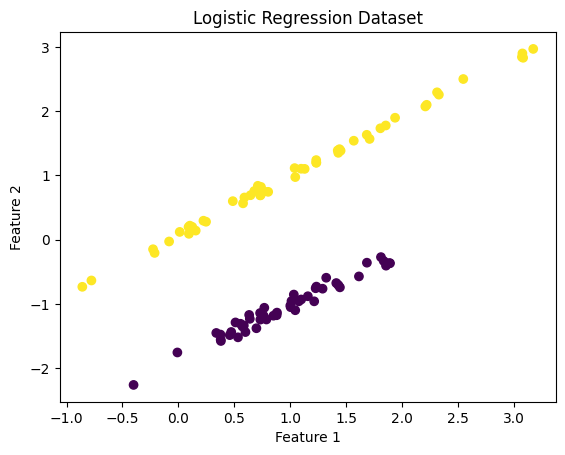

In [8]:
def generate_and_plot_dataset():
    # 生成一个逻辑回归的数据集
    x, y = make_classification(n_samples=100, n_features=2, 
                               n_informative=2, n_redundant=0, 
                               n_clusters_per_class=1, random_state=42)
    # 可视化数据集
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Dataset')
    plt.show()
    return x,y
x,y = generate_and_plot_dataset()

模型准确率: 1.00


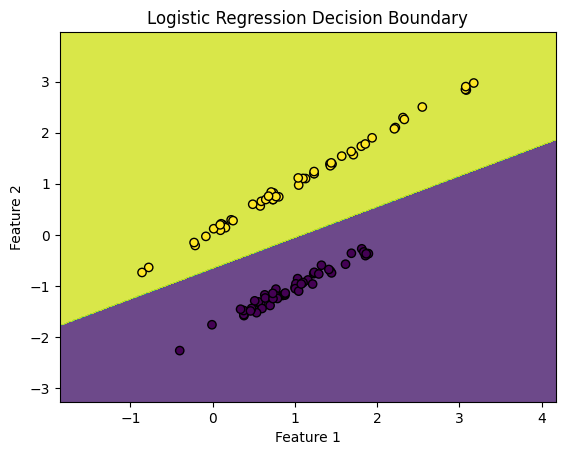

In [9]:

def logistic_regression_analysis(x, y):
    # 创建逻辑回归模型
    model = LogisticRegression()

    # 拟合模型
    model.fit(x, y)

    # 预测
    y_pred = model.predict(x)

    # 计算准确率
    accuracy = accuracy_score(y, y_pred)
    print(f'模型准确率: {accuracy:.2f}')

    # 绘制决策边界
    # 创建网格以绘制决策边界
    xx, yy = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                         np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))

    # 预测网格点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# 调用函数
logistic_regression_analysis(x, y)

## 手动实现
$$
f_{\vec{w},b}(x) = g(z) = \frac{1}{1 + e^{-(\vec{w} \cdot \vec{x} + b)}}
$$

$$
J(\vec{w},b) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)}\ln(f_{\vec{w},b}(x^{(i)})) + (1-y^{(i)})\ln(1-f_{\vec{w},b}(x^{(i)})) \right)
$$

$$
w_j = w_j - \alpha \frac{\partial J(\vec{w},b)}{\partial w_j}
$$

$$
b = b - \alpha \frac{\partial J(\vec{w},b)}{\partial b}
$$

$$
\frac{\partial J(\vec{w},b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (f_{\vec{w},b}(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

$$
\frac{\partial J(\vec{w},b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{\vec{w},b}(x^{(i)}) - y^{(i)})
$$

In [12]:
def compute_cost_vectorized(w, b):
    m = x.shape[0]
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    cost = (-1/m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost
    
def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def gradient_descent(w, b, alpha, num_iterations):
    m = len(x)
    for i in range(num_iterations):
        z = np.dot(w, x.T) + b
        f_wb = sigmoid(z)
        w -= alpha * 1/m * np.dot(x.T, (f_wb-y))
        b -= alpha * 1/m * np.sum(f_wb-y)
    return w, b

[-5.06824725  7.0491495 ] 5.093279915903578
0.0014207659474689705


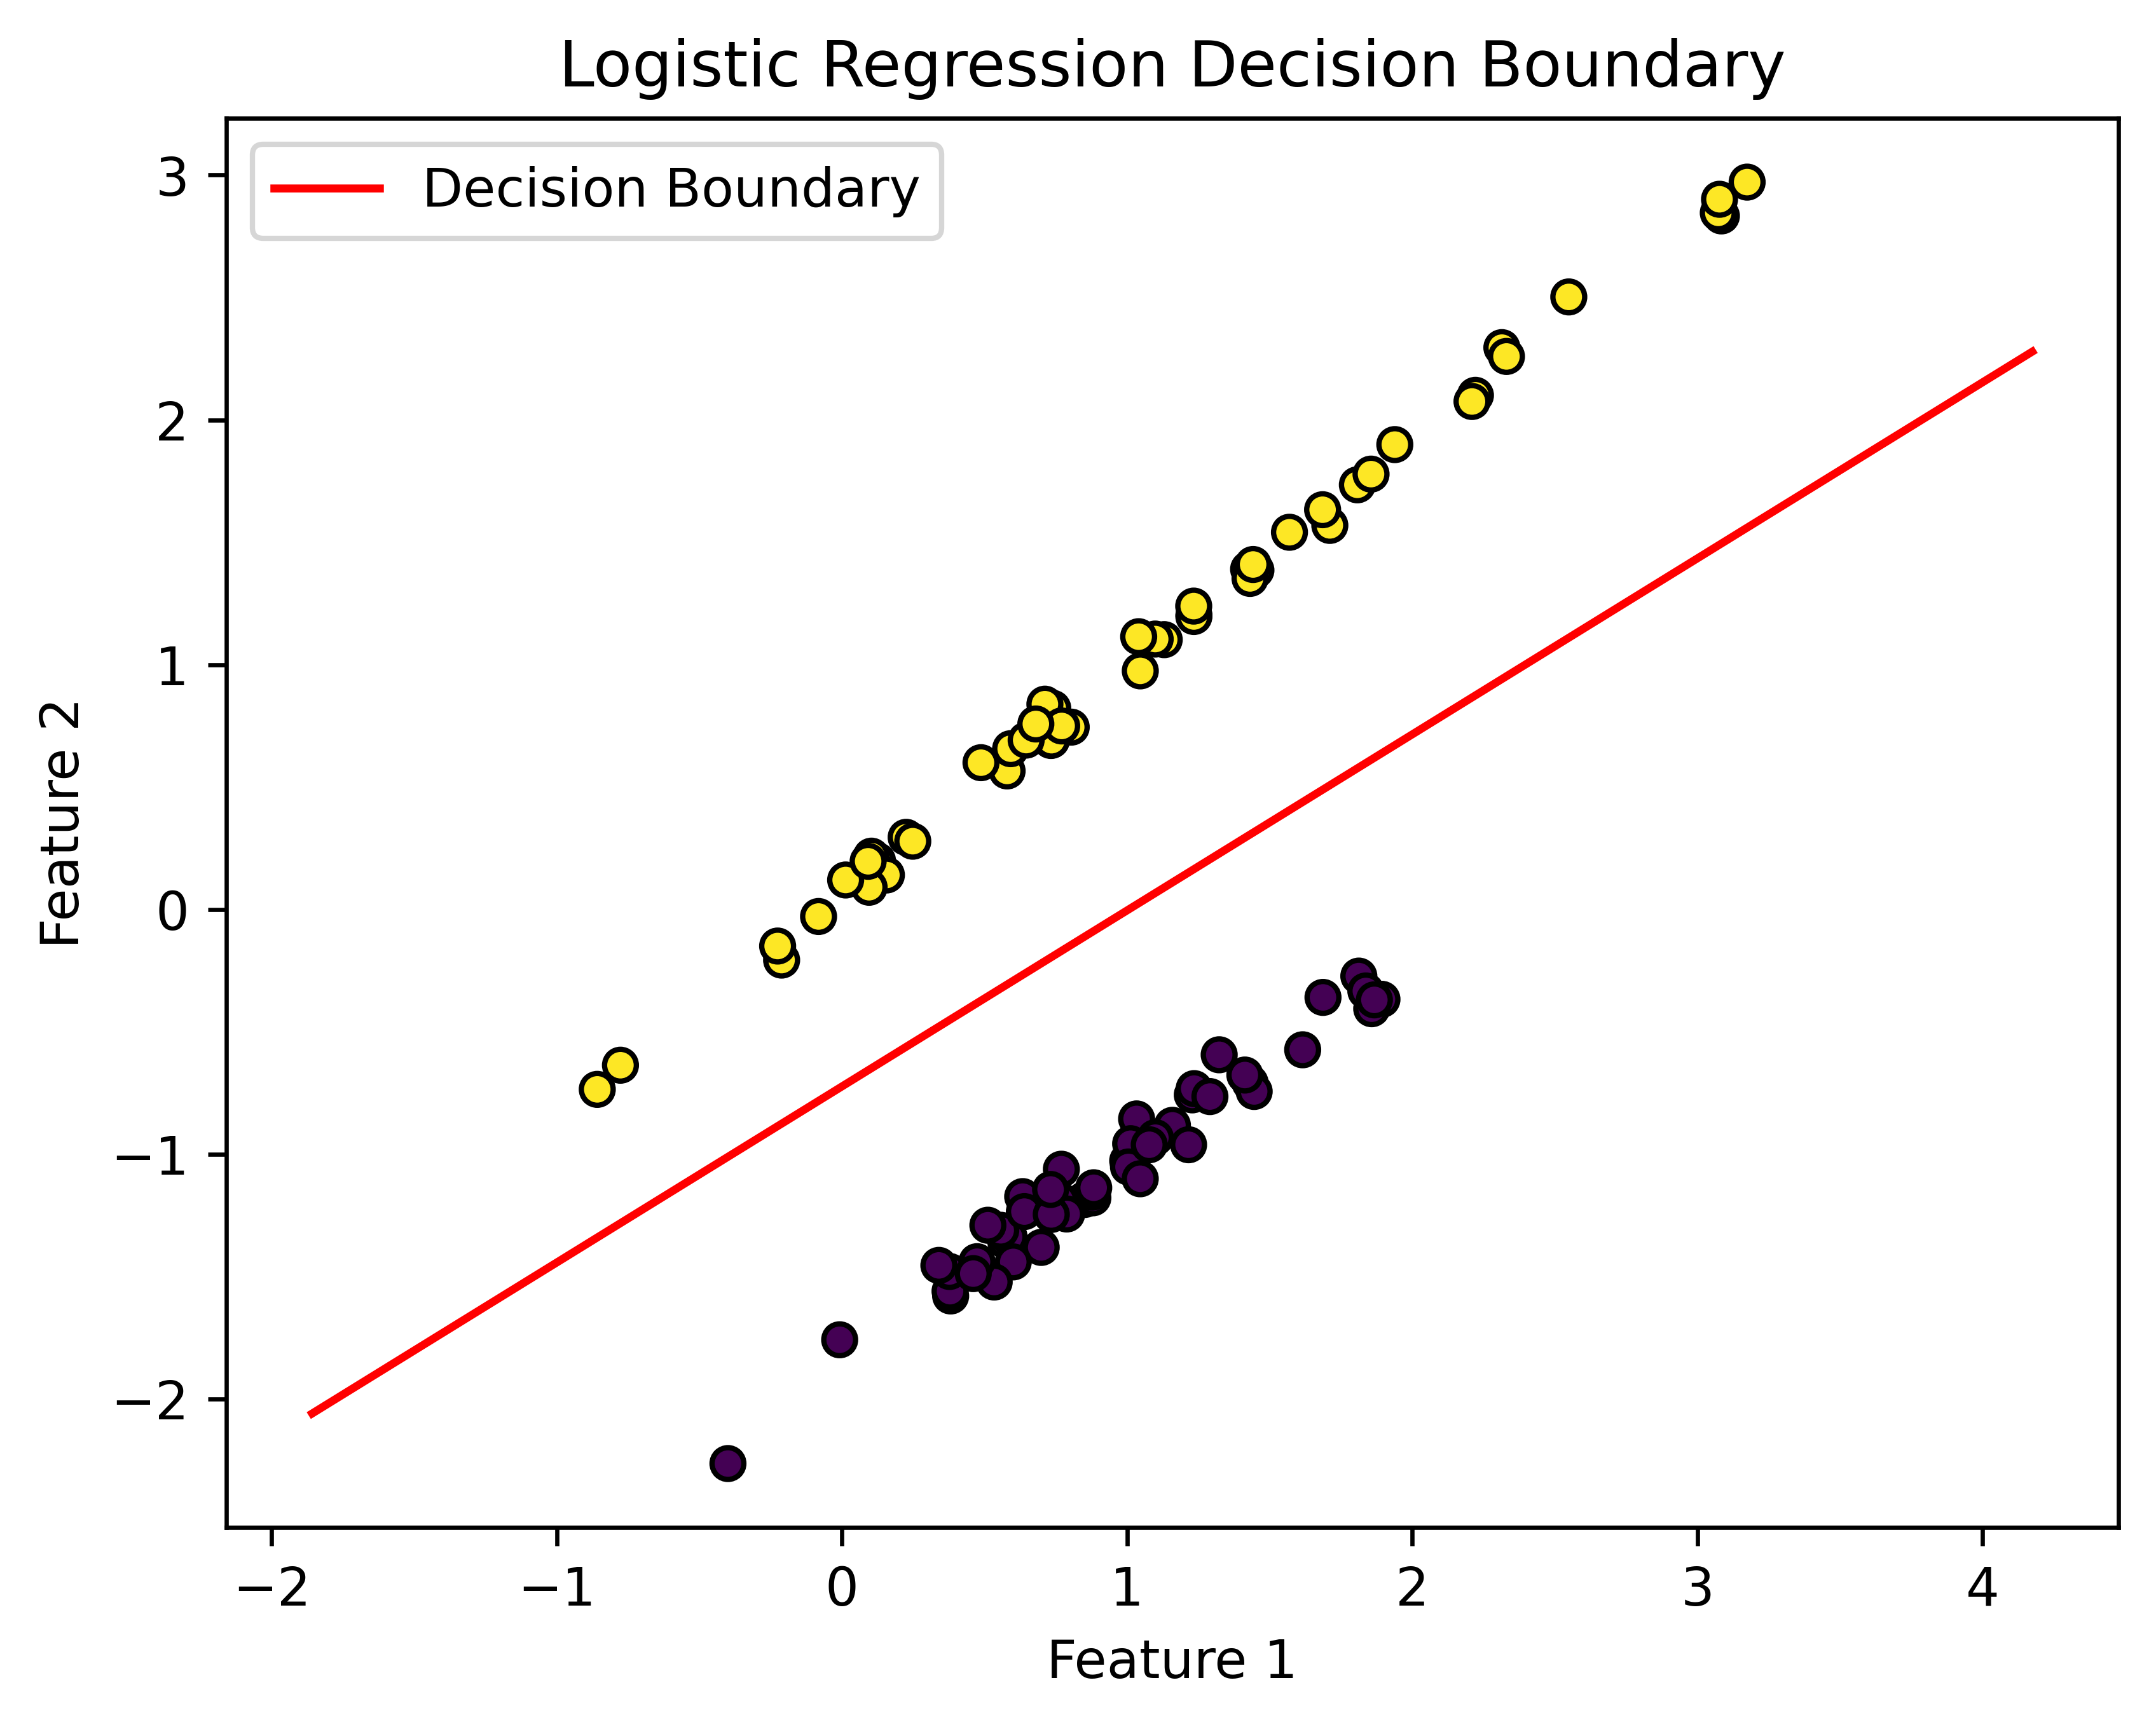

In [25]:
if __name__ == "__main__":
    w = np.zeros(x.shape[1])
    b = 0
    alpha = 0.04
    num_iterations = 50000
    w, b = gradient_descent(w, b, alpha, num_iterations)
    print(w, b)
    loss = compute_cost_vectorized(w, b)
    print(loss)
    
    plt.figure(dpi=600)
    # 绘制数据点
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k')

    # 计算决策边界
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    # 计算对应的y值: w1*x + w2*y + b = 0 => y = -(w1*x + b)/w2
    if w[1] != 0:
        yy = -(w[0] * xx + b) / w[1]
        plt.plot(xx, yy, color='red', label='Decision Boundary')
    else:
        # 当w2=0时，决策边界为垂直线x = -b/w1
        x_boundary = -b / w[0]
        plt.axvline(x=x_boundary, color='red', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()